<a href="https://colab.research.google.com/github/yualapshina/distrib-lab1/blob/master/distrib_lab1_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# препроцессинг

In [1]:
!pip install celluloid --quiet
!git clone https://github.com/yualapshina/distrib-lab1.git --quiet

In [2]:
from celluloid import Camera
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image
import pandas as pd
import os

%matplotlib inline

# основной пайплайн

In [15]:
filenames = ["orig_serial", "naive_parallel", "memory_hell"]
# три версии кода:
# - однопоточная, алгоритм максимально оригинальный (ещё не исправлены коллизии), изменён чисто формат вывода
# - основная, разделение просто поровну между потоками
# - дополнительная. была амбициозная попытка реализовать оптимальное разделение задач
#   по точности вычислений получилось лучше наивной, по времени - хуже не то что наивной, а даже последовательной (да, и с памятью беда)

# тут выбрать файл
os.environ['filename'] = filenames[2]

In [5]:
# редактировать ввод
bodies = 5
time_steps = 500
mass = 1000000
pos_coef = 0.1 # для рисования удобны шаги поменьше
vel_coef = 0

input_content = "6.6743e-11 " + str(bodies) + " " + str(time_steps) + "\n";
for i in range(bodies):
  input_content += str(mass) + "\n";
  input_content += str(i * pos_coef) + " " + str(i * pos_coef) + "\n";
  input_content += str(i * vel_coef) + " " + str(i * vel_coef) + "\n";

with open("distrib-lab1/input.txt", "w") as fin:
  fin.write(input_content);

In [6]:
# проверить ввод
with open("distrib-lab1/input.txt", "r") as fin:
  check_content = fin.read()
print(check_content)

6.6743e-11 5 500
1000000
0.0 0.0
0 0
1000000
0.1 0.1
0 0
1000000
0.2 0.2
0 0
1000000
0.30000000000000004 0.30000000000000004
0 0
1000000
0.4 0.4
0 0



In [7]:
# запустить (число потоков тоже менять тут)
# время выполнения выводится
%%shell
cd distrib-lab1
gcc $filename.c -o $filename -lm
./$filename input.txt 2

Time: 0.021132 seconds


In [8]:
# читать вывод
with open("distrib-lab1/output.txt", "r") as fout:
  output_content = fout.read()
print(output_content)

Body   :     x              y           vx              vy   

Cycle 1
Body 1 : 0.000000	0.000000	0.000168	0.000168
Body 2 : 0.100000	0.100000	0.000043	0.000043
Body 3 : 0.200000	0.200000	0.000000	0.000000
Body 4 : 0.300000	0.300000	-0.000043	-0.000043
Body 5 : 0.400000	0.400000	-0.000168	-0.000168

Cycle 2
Body 1 : 0.000008	0.000008	0.000336	0.000336
Body 2 : 0.100002	0.100002	0.000085	0.000085
Body 3 : 0.200000	0.200000	0.000000	0.000000
Body 4 : 0.299998	0.299998	-0.000085	-0.000085
Body 5 : 0.399992	0.399992	-0.000336	-0.000336

Cycle 3
Body 1 : 0.000025	0.000025	0.000504	0.000504
Body 2 : 0.100006	0.100006	0.000128	0.000128
Body 3 : 0.200000	0.200000	0.000000	0.000000
Body 4 : 0.299994	0.299994	-0.000128	-0.000128
Body 5 : 0.399975	0.399975	-0.000504	-0.000504

Cycle 4
Body 1 : 0.000050	0.000050	0.000672	0.000672
Body 2 : 0.100013	0.100013	0.000170	0.000170
Body 3 : 0.200000	0.200000	0.000000	0.000000
Body 4 : 0.299987	0.299987	-0.000170	-0.000170
Body 5 : 0.399950	0.399950	-0.000

In [9]:
# читать табличку
df = pd.read_csv('distrib-lab1/output')
df.set_index("t", inplace=True)
df

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
t,,,,,,,,,,
1,0.000000,0.000000,0.100000,0.100000,0.2,0.2,0.300000,0.300000,0.400000,0.400000
2,0.000008,0.000008,0.100002,0.100002,0.2,0.2,0.299998,0.299998,0.399992,0.399992
3,0.000025,0.000025,0.100006,0.100006,0.2,0.2,0.299994,0.299994,0.399975,0.399975
4,0.000050,0.000050,0.100013,0.100013,0.2,0.2,0.299987,0.299987,0.399950,0.399950
5,0.000084,0.000084,0.100021,0.100021,0.2,0.2,0.299979,0.299979,0.399916,0.399916
...,...,...,...,...,...,...,...,...,...,...
496,-5.974285,-5.974285,-2.182877,-2.182877,0.2,0.2,2.582877,2.582877,6.374285,6.374285
497,-5.991871,-5.991871,-2.189149,-2.189149,0.2,0.2,2.589149,2.589149,6.391871,6.391871
498,-6.009457,-6.009457,-2.195421,-2.195421,0.2,0.2,2.595421,2.595421,6.409457,6.409457


In [10]:
# тут визуализация
fig = plt.figure()
camera = Camera(fig)

bodies = df.shape[1] // 2
for i in range(df.shape[0]):
  # рисуем все точки для каждого t
  for j in range(bodies):
    plt.scatter(df.iloc[i]["x" + str(j + 1)], df.iloc[i]["y" + str(j + 1)])
  # запоминаем кадр
  camera.snap()
plt.close()

# анимируем
animation = camera.animate(interval=25)
HTML(animation.to_html5_video())
# анимируется не мгновенно, особенно на больших t, подождать
# (пять точек на 1000 шагов у меня занимало минуты четыре)

# Оценка производительности

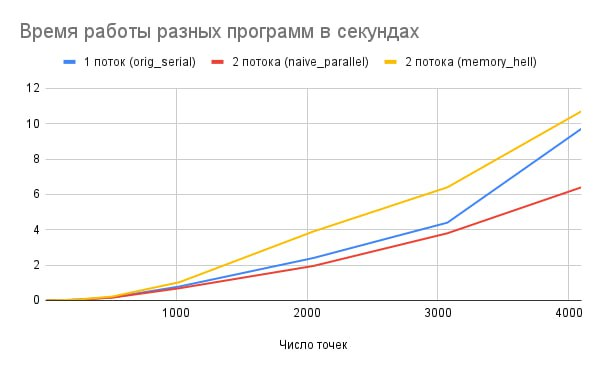

In [14]:
Image('distrib-lab1/pictures/timing_versions.jpeg')
# мда
# все остальные метрики будут касаться результатов naive_parallel (не считая, естественно, оригинала)

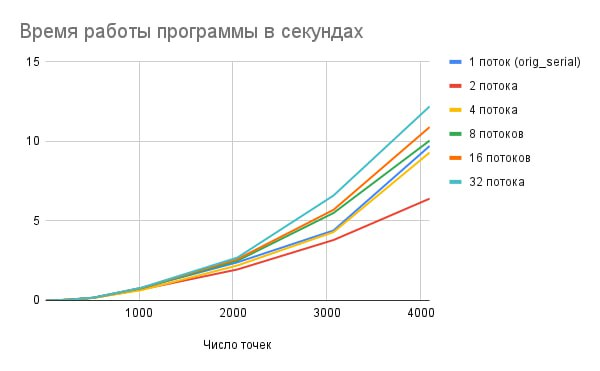

In [12]:
Image('distrib-lab1/pictures/timing_threads.jpeg')

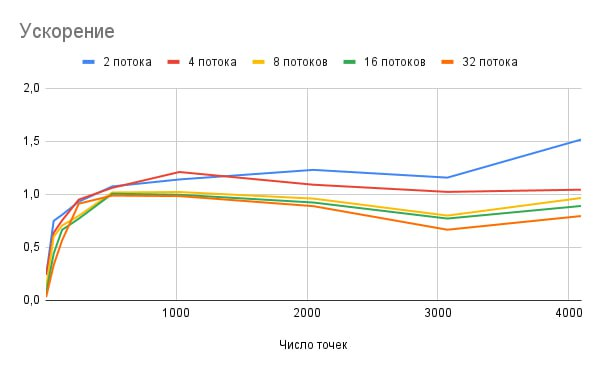

In [13]:
Image('distrib-lab1/pictures/speedup.jpeg')

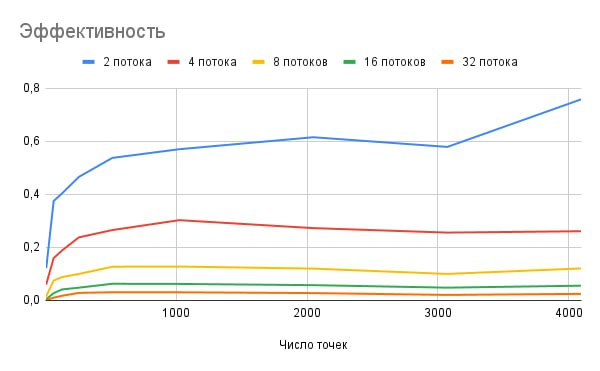

In [ ]:
Image('distrib-lab1/pictures/efficiency.jpeg')